# 월간 보고서
## COVID-19로 인한 서울시 문화 여가 트렌드 변화
***

#### Data : Tmap 검색 데이터(2019.01 ~ 2020.12) , 유동인구 데이터(2019.03 ~ 2020.12) - [SKT Data Hub]
#### Data : 온라인 검색량 데이터(2019.01 ~ 2020.12) - [한국문화정보원] 

### Process

1. NAVER 뉴스 기사 키워드 분석(2019, 2020, 2021) - 여행/레저, 공연/전시
2. Tmap & 유동인구 데이터 분석
3. 실제 온라인 검색량 데이터 분석

***
#### Package Import

In [3]:
from collections import Counter
import pandas as pd
import numpy as np

from konlpy.tag import Mecab

import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 1. NAVER 뉴스 기사 키워드 분석

In [4]:
mecab = Mecab()

In [6]:
p19 = pd.read_csv("2019공연전시.csv")
p20 = pd.read_csv("2020공연전시.csv")
p21 = pd.read_csv("2021공연전시.csv")

In [7]:
t19 = pd.read_csv("2019여행레저.csv")
t20 = pd.read_csv("2020여행레저.csv")
t21 = pd.read_csv("2021여행레저.csv")

### customizing function for text cleansing

In [8]:
def mdjj(x) :
    idx = x.find('무단전재')
    if idx > -1 :
        return x[:idx]
    else :
        return x

def md_jj(x) :
    idx = x.find('무단 전재')
    if idx > -1 :
        return x[:idx]
    else :
        return x

def gj_name(x) :
    try :
        idx = x.find(re.findall(r'[가-힣]{3} 기자+', x)[0])
        if idx > -1 :
            return x[:idx]
        else :
            return x
    except :
        return x

def na_new(x) :
    idx = x.find('네이버에서도 뉴스는')
    if idx > -1 :
        return x[:idx]
    else :
        return x

def st(x) :
    try :
        idx = x.find('제공 재판매 및 금지')
        if idx > -1 :
            return x[:idx]
        else :
            return x
    except :
        return x

In [9]:
t19.내용 = t19.내용.apply(mdjj).apply(md_jj).apply(gj_name).apply(na_new).apply(st)
t20.내용 = t20.내용.apply(mdjj).apply(md_jj).apply(gj_name).apply(na_new).apply(st)
t21.내용 = t21.내용.apply(mdjj).apply(md_jj).apply(gj_name).apply(na_new).apply(st)

p19.내용 = p19.내용.apply(mdjj).apply(md_jj).apply(gj_name).apply(na_new).apply(st)
p20.내용 = p20.내용.apply(mdjj).apply(md_jj).apply(gj_name).apply(na_new).apply(st)
p21.내용 = p21.내용.apply(mdjj).apply(md_jj).apply(gj_name).apply(na_new).apply(st)

### 명사만 추출해 토큰에 저장

In [10]:
p19['token'] = [mecab.nouns(x) for x in p19.내용]
p20['token'] = [mecab.nouns(x) for x in p20.내용]
p21['token'] = [mecab.nouns(x) for x in p21.내용]
t19['token'] = [mecab.nouns(x) for x in t19.내용]
t20['token'] = [mecab.nouns(x) for x in t20.내용]
t21['token'] = [mecab.nouns(x) for x in t21.내용]

### 불용어(무의미한 명사) 삭제

In [11]:
def get_token(data) :
    tokens = []
    for t in data.token :
        token_list = []
        for t2 in t :
            if len(t2) > 1 and t2 not in ['물방울', '데일리', '헤럴드', '때문', '연합뉴스', '구독', '올해', '이번', '지난해', '기자', '뉴스', '뉴시스', '제공', '사진', '네이버'] :
                token_list.append(t2)
            else :
                pass
        tokens.append(token_list)
    return tokens

In [15]:
p19.token = get_token(p19)
p20.token = get_token(p20)
p21.token = get_token(p21)
t19.token = get_token(t19)
t20.token = get_token(t20)
t21.token = get_token(t21)

### wordcloud 그리기

In [25]:
def get_wc(data, mask = None) :

    def color_f(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h = int(360.0 * 21.0 / 255.0)
        s = int(100.0 * 255.0 / 255.0)
        l = int(100.0 * 21.0 / 255.0)

        return "hsl({}, {}%, {}%)".format(h, s, l)
    icon = Image.open('1293790.png')
    mask1 = Image.new('RGB', icon.size, (255, 255, 255))
    mask1.paste(icon, icon)
    mask1 = np.array(mask1)
    
    m150 = dict(Counter(data.token.sum(axis = 0)).most_common(150)) # 가장 빈번히 등장한 단어 150개
    if mask == True :
        kw = {'mask' : mask1}
    else :
        kw = {'mask' : None}
        
    wc = WordCloud(max_font_size = 300, background_color='white', width = 1000, height = 600, font_path = 'AppleGothic', **kw).generate_from_frequencies(m150)
    re_wc = wc.recolor(color_func = color_f, random_state = True)
    plt.figure(figsize = (12, 8))
    plt.imshow(re_wc)

#### 19년 공연전시

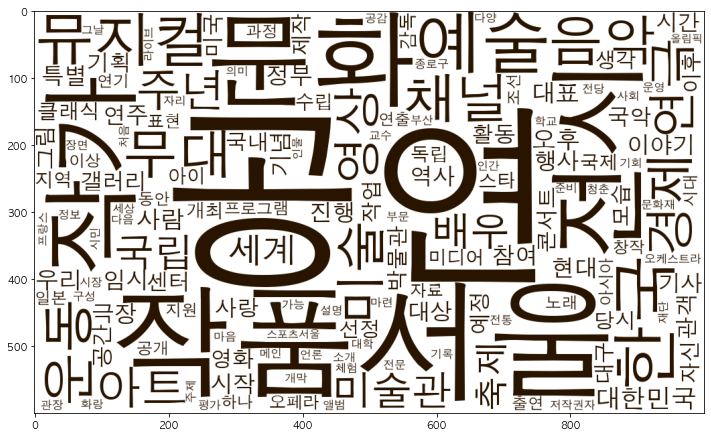

In [26]:
get_wc(p19)

#### 20년 공연전시

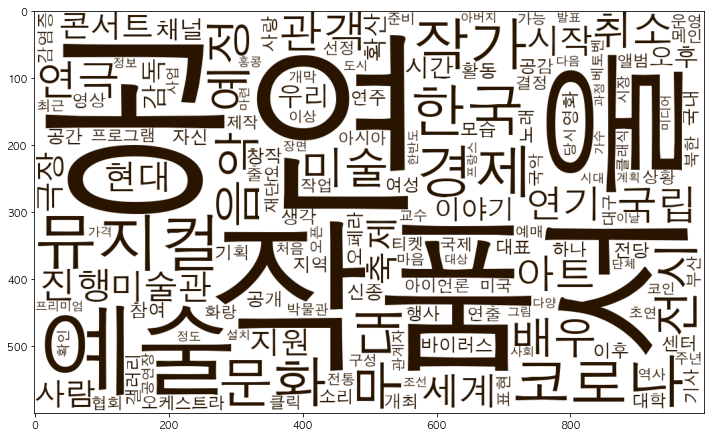

In [20]:
get_wc(p20)

#### 21년 공연전시

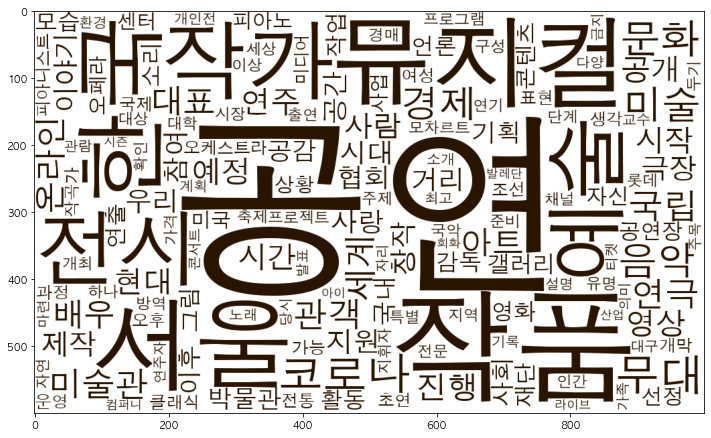

In [21]:
get_wc(p21)

#### 19년 여행레저

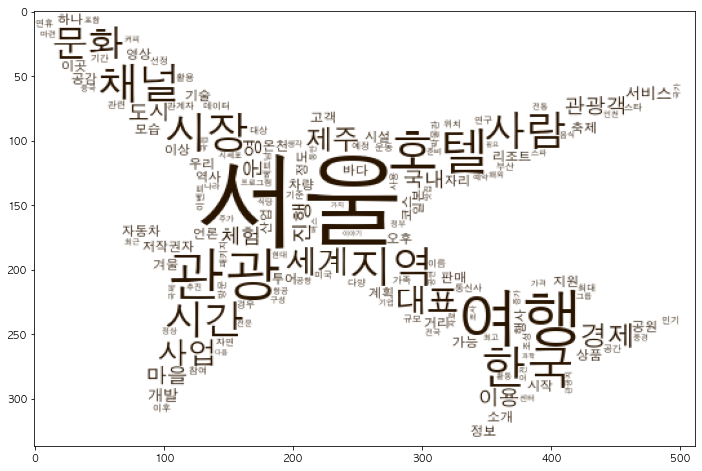

In [28]:
get_wc(t19, mask = True)

#### 20년 여행레저

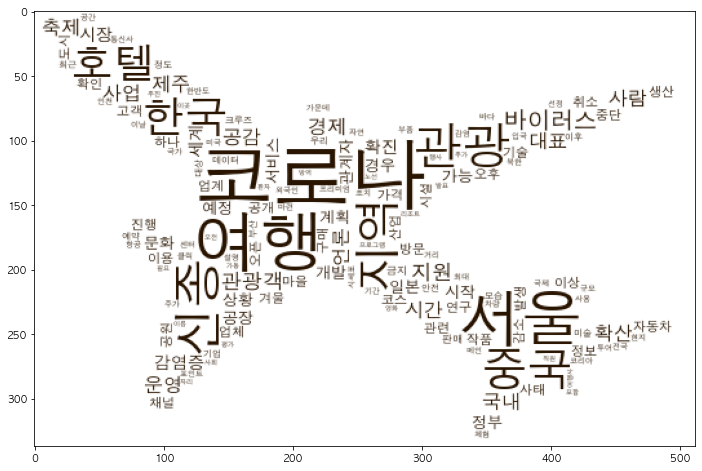

In [30]:
get_wc(t20, mask = True)

#### 21년 여행레저

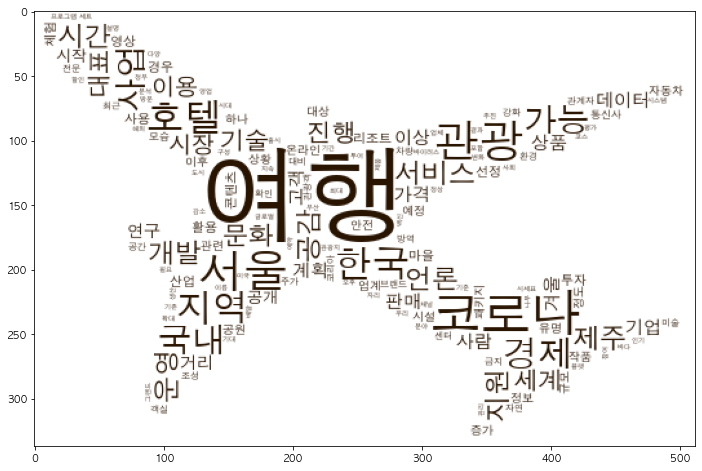

In [31]:
get_wc(t21, mask = True)

## 2. Tmap & 유동인구 데이터 분석

### 2-1. Tmap

In [33]:
tmap_dir = '/Users/kisehyun/toy_project/seoul/검색량/'
move_dir = '/Users/kisehyun/toy_project/seoul/유동인구/'

In [67]:
# 유동인구 데이터 병합
move = pd.DataFrame()
for f in sorted(os.listdir(move_dir))[1:] :
    move = pd.concat([move, pd.read_csv(move_dir + f)], axis = 0, ignore_index = True)

In [93]:
# Tmap 데이터 병합
tmap = pd.DataFrame()
for f in sorted(os.listdir(tmap_dir))[1:] :
    tmap = pd.concat([tmap, pd.read_csv(tmap_dir + f)], axis = 0, ignore_index = True)

In [94]:
tmap.columns = ['일자', '시도', '구', '검색지명', '대분류', '중분류', '소분류', '검색지랭킹(시군구내)']

In [95]:
tmap.at[tmap.loc[tmap.대분류 == 'BMW'].index, '대분류'] = '교통편의'
tmap.at[tmap.loc[tmap.대분류 == 'AOI'].index, ['대분류', '중분류', '소분류']] = ['생활편의', '음식점', '분식']
tmap.at[tmap.loc[tmap.대분류 == '그룹핑부속'].index, '대분류'] = '교통편의'

In [96]:
tmap.at[tmap.loc[tmap.중분류 == '데이트코스'].index, '중분류'] = '레저/스포츠'
tmap.at[tmap.loc[tmap.중분류 == '음식료'].index, '중분류'] = '시장'
tmap.at[tmap.loc[tmap.중분류 == '여행/레저기타'].index, '중분류'] = '레저/스포츠'

In [97]:
tmap['일자'] = pd.to_datetime(tmap.일자.astype('str'))
tmap['월'] = tmap.일자.dt.month
tmap['요일'] = tmap.일자.dt.day_name()
tmap['년도'] = tmap.일자.dt.year
tmap['주차'] = tmap.일자.dt.weekofyear
tmap['년월'] = tmap.년도.astype('str') + ['0' + str(x) if len(str(x)) < 2 else str(x) for x in tmap.월]

In [98]:
use_cat = ['문화생활시설', '음식점', '숙박', '관광명소', '레저/스포츠']

In [99]:
tmap_cat = tmap.query('중분류 in @use_cat')

In [100]:
ym_ct = pd.crosstab(tmap_cat.년월, tmap_cat.중분류)

In [101]:
ratio_trend = pd.DataFrame(ym_ct.iloc[12:].values / ym_ct.iloc[:12].values, columns = ym_ct.columns)
ratio_trend.columns.name = None
ratio_trend

,관광명소,레저/스포츠,문화생활시설,숙박,음식점
0,0.952812,1.056635,0.855587,0.963815,0.972605
1,0.949609,1.135676,0.520645,0.864078,1.068194
2,1.021134,1.024992,0.371417,0.670547,0.941792
3,0.924381,0.964557,0.312906,0.725018,0.912684
4,0.888586,0.887599,0.359403,0.851521,0.856084
5,0.855331,0.886635,0.329157,0.927884,0.754473
6,0.966085,0.886619,0.452088,1.166028,0.445368
7,0.947574,0.901434,0.481638,1.338230,0.385413
8,0.983078,0.952396,0.446813,1.178370,0.362549
9,0.980115,0.920986,0.545455,1.180627,0.366012


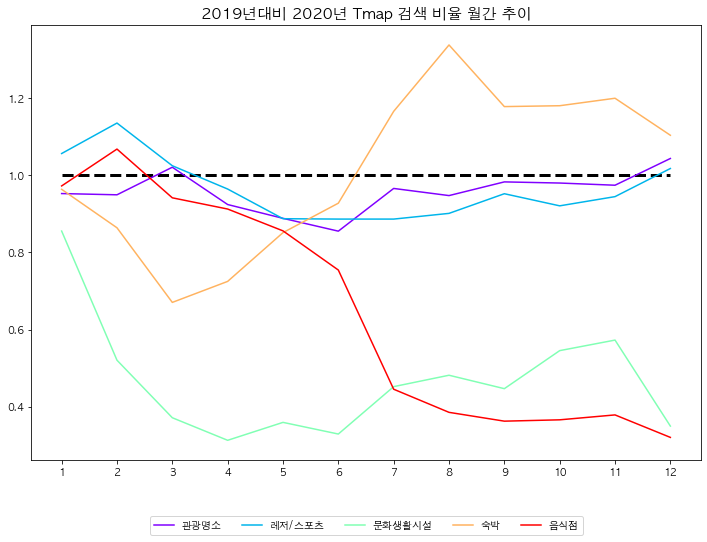

In [102]:
plt.rcParams['figure.figsize'] = (12, 8)
ratio_trend.plot(cmap = 'rainbow')
plt.title("2019년대비 2020년 Tmap 검색 비율 월간 추이", fontsize = 15)
plt.hlines(1, 0, 11, linestyle = '--', color = 'black', linewidth = 3)
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 7)
plt.xticks(np.arange(0, 12), np.arange(1,13))
plt.show()

In [103]:
move = move.loc[move.시 == '서울']
tmap = tmap.loc[tmap.시도 == '서울']

In [104]:
tmap.head()

,일자,시도,구,검색지명,대분류,중분류,소분류,검색지랭킹(시군구내),월,요일,년도,주차,년월
840,2019-01-16,서울,성북구,고려대부속안암병원,의료편의,의료시설,종합병원,1,1,Wednesday,2019,3,201901
841,2019-01-16,서울,성북구,국민대학교,공공편의,교육기관,대학교,2,1,Wednesday,2019,3,201901
842,2019-01-16,서울,성북구,고려대학교서울캠퍼스,공공편의,교육기관,대학교,3,1,Wednesday,2019,3,201901
843,2019-01-16,서울,성북구,월곡두산위브아파트,건물/시설,주요건물,아파트브랜드,4,1,Wednesday,2019,3,201901
844,2019-01-16,서울,성북구,길음뉴타운푸르지오2단지아파트,건물/시설,주요건물,아파트브랜드,5,1,Wednesday,2019,3,201901


In [105]:
tmap19 = tmap.loc[tmap.년도 == 2019]
tmap20 = tmap.loc[tmap.년도 == 2020]

In [106]:
top19_des = tmap19.검색지명.value_counts()[:20].reset_index(name = '검색량')
top19_des.head()

,index,검색량
0,서울역,1066
1,용산역,797
2,건대입구역,724
3,합정역,656
4,강남역,574


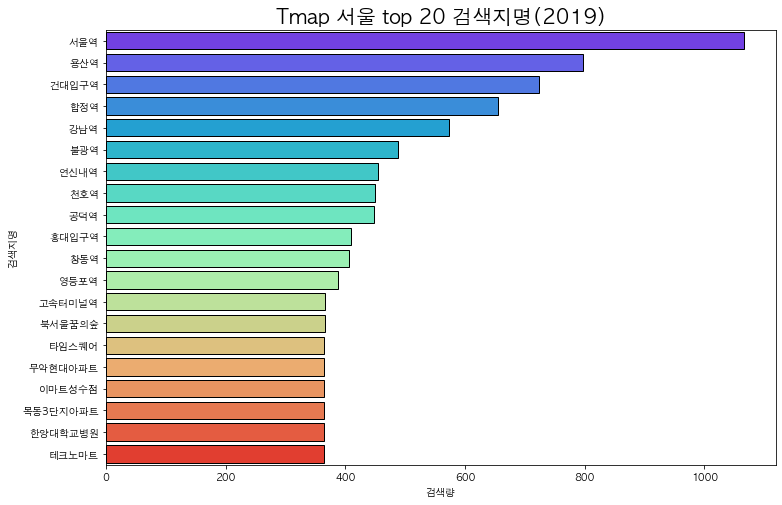

In [107]:
plt.figure(figsize = (12, 8))
sns.barplot(x = top19_des.검색량, y = top19_des['index'], edgecolor = (0, 0, 0), palette = 'rainbow')
plt.title('Tmap 서울 top 20 검색지명(2019)', size = 20)
plt.ylabel('검색지명')
plt.show()

In [108]:
top20_des = tmap20.검색지명.value_counts()[:20].reset_index(name = '검색량')
top20_des.head()

,index,검색량
0,서울역,648
1,건대입구역,569
2,북서울꿈의숲,410
3,천호역,397
4,어린이대공원,377


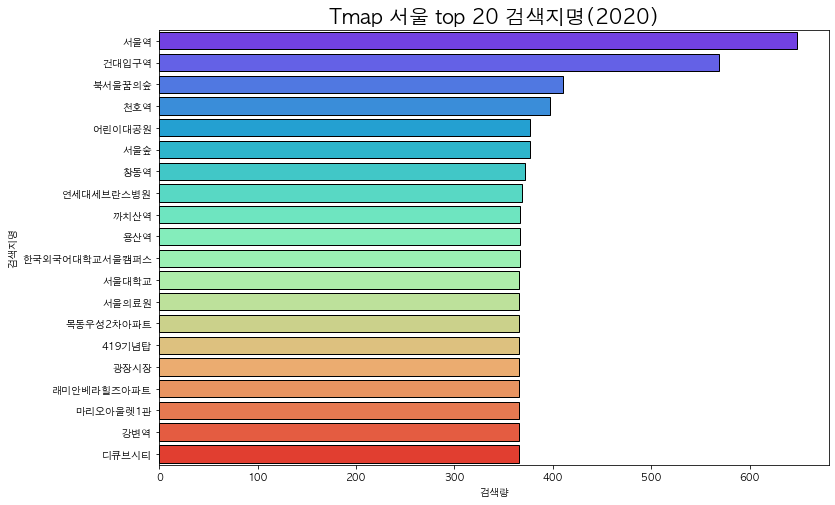

In [109]:
plt.figure(figsize = (12, 8))
sns.barplot(x = top20_des.검색량, y = top20_des['index'], edgecolor = (0, 0, 0), palette = 'rainbow')
plt.title('Tmap 서울 top 20 검색지명(2020)', size = 20)
plt.ylabel('검색지명')
plt.show()

In [110]:
d19 = tmap19.query('중분류 in @use_cat')

d20 = tmap20.query('중분류 in @use_cat')

In [111]:
def get_weekday(x) :
    if x in ['Saturday', 'Sunday'] :
        return '주말'
    else :
        return '평일'

In [112]:
tmap_new = tmap.query('중분류 in @use_cat')

In [113]:
tmap_new['평일주말'] = tmap_new.요일.apply(get_weekday)

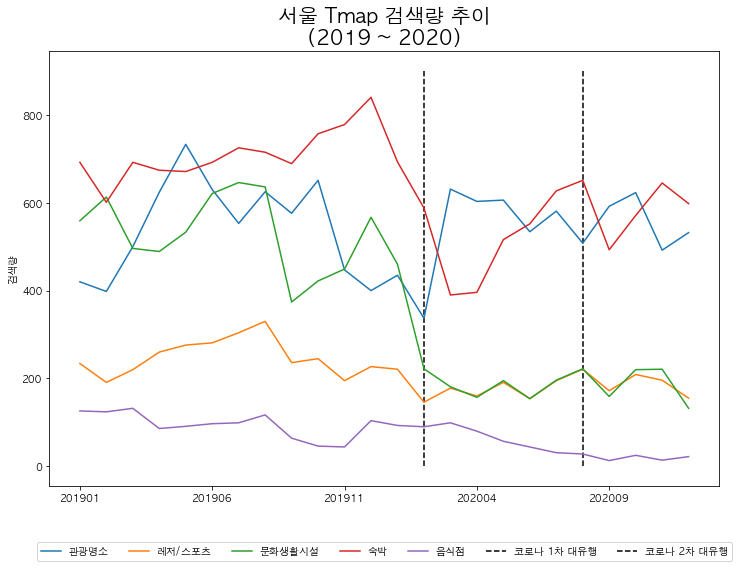

In [115]:
plt.rcParams['figure.figsize'] = (12, 8)
pd.crosstab(tmap_new.년월, tmap_new.중분류).plot()
plt.title('서울 Tmap 검색량 추이\n(2019 ~ 2020)', size = 20)
plt.vlines(13, ymin = 0, ymax = 900, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(19, ymin = 0, ymax = 900, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 7)
plt.xlabel(None)
plt.ylabel('검색량')

plt.show()

### 숙박

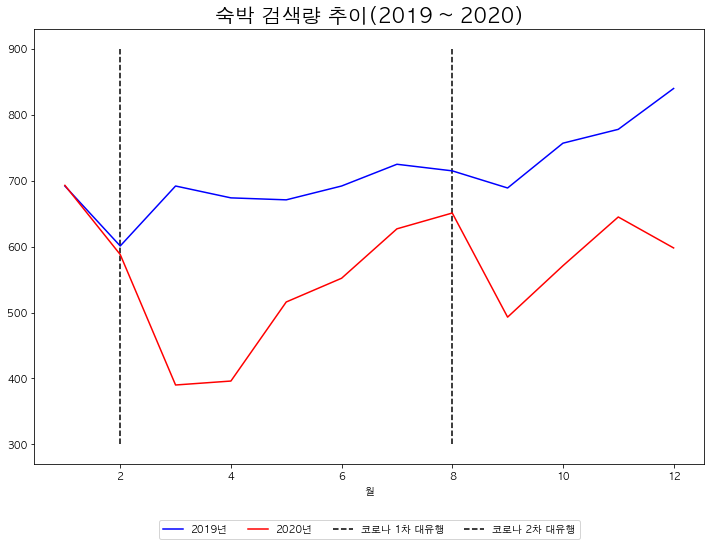

In [116]:
d1 = tmap_new.loc[tmap.중분류 == '숙박']
plt.title('숙박 검색량 추이(2019 ~ 2020)', size = 20)
d1.loc[d1.년도 == 2019].groupby('월').검색지명.size().plot(color = 'b', label = '2019년')
d1.loc[d1.년도 == 2020].groupby('월').검색지명.size().plot(color = 'r', label = '2020년')
plt.vlines(2, ymin = 300, ymax = 900, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(8, ymin = 300, ymax = 900, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)

plt.show()

### 문화생활시설

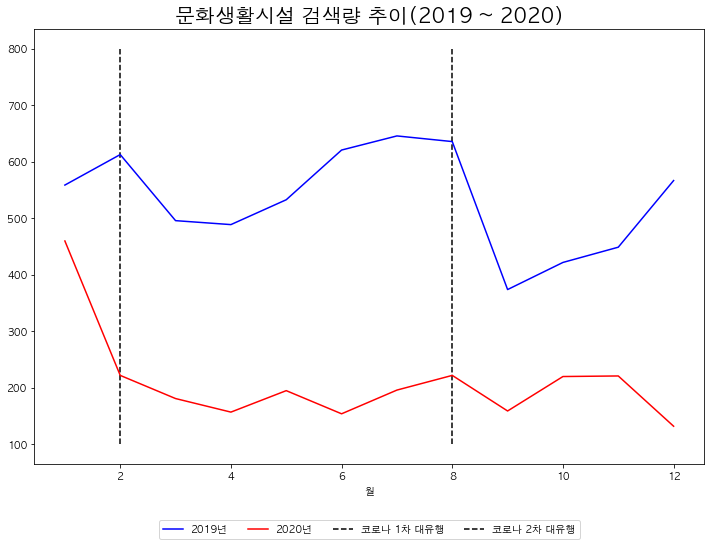

In [117]:
d2 = tmap_new.loc[tmap.중분류 == '문화생활시설']
plt.title('문화생활시설 검색량 추이(2019 ~ 2020)', size = 20)
d2.loc[d2.년도 == 2019].groupby('월').검색지명.size().plot(color = 'b', label = '2019년')
d2.loc[d2.년도 == 2020].groupby('월').검색지명.size().plot(color = 'r', label = '2020년')
plt.vlines(2, ymin = 100, ymax = 800, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(8, ymin = 100, ymax = 800, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.show()

### 관광명소

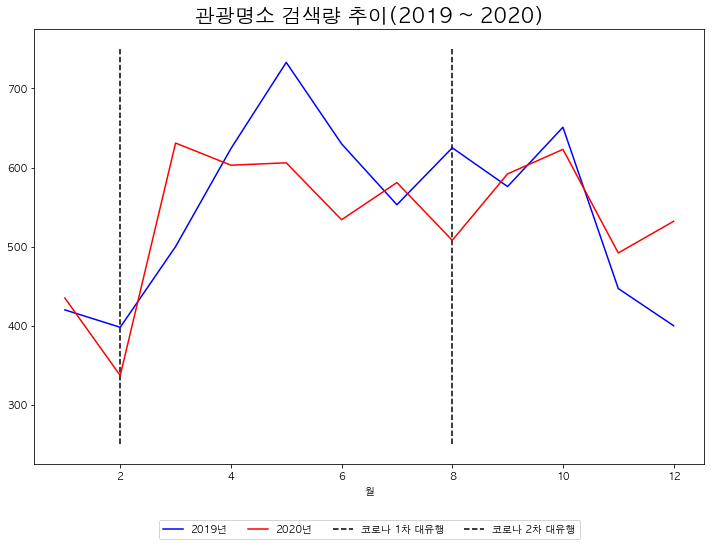

In [118]:
d3 = tmap_new.loc[tmap.중분류 == '관광명소']
plt.title('관광명소 검색량 추이(2019 ~ 2020)', size = 20)
d3.loc[d3.년도 == 2019].groupby('월').검색지명.size().plot(color = 'b', label = '2019년')
d3.loc[d3.년도 == 2020].groupby('월').검색지명.size().plot(color = 'r', label = '2020년')
plt.vlines(2, ymin = 250, ymax = 750, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(8, ymin = 250, ymax = 750, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.show()

### 레저스포츠

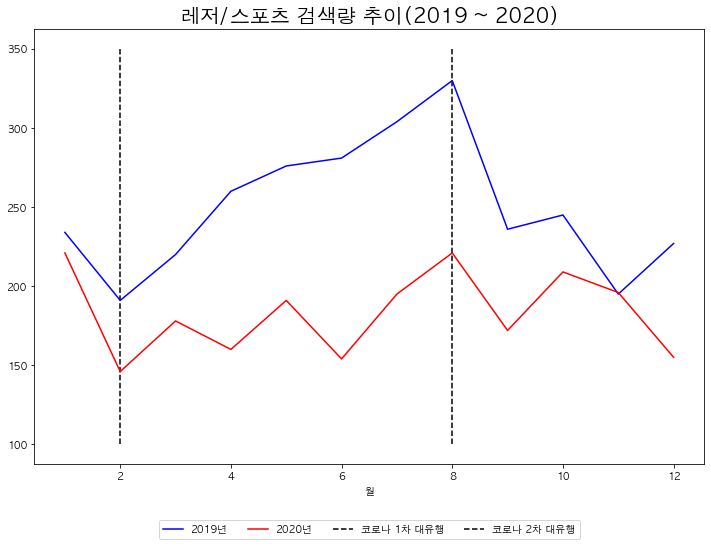

In [119]:
d4 = tmap_new.loc[tmap.중분류 == '레저/스포츠']
plt.title('레저/스포츠 검색량 추이(2019 ~ 2020)', size = 20)
d4.loc[d4.년도 == 2019].groupby('월').검색지명.size().plot(color = 'b', label = '2019년')
d4.loc[d4.년도 == 2020].groupby('월').검색지명.size().plot(color = 'r', label = '2020년')
plt.vlines(2, ymin = 100, ymax = 350, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(8, ymin = 100, ymax = 350, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.show()

### 음식점

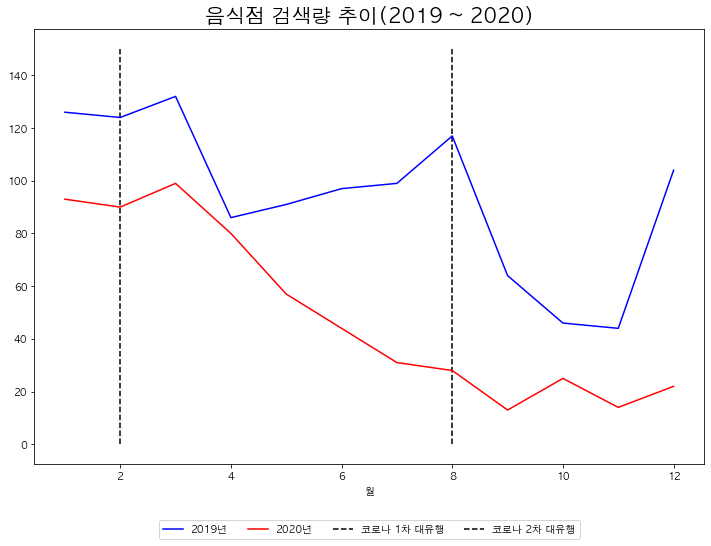

In [120]:
d5 = tmap.loc[tmap.중분류 == '음식점']
plt.title('음식점 검색량 추이(2019 ~ 2020)', size = 20)
d5.loc[d5.년도 == 2019].groupby('월').검색지명.size().plot(color = 'b', label = '2019년')
d5.loc[d5.년도 == 2020].groupby('월').검색지명.size().plot(color = 'r', label = '2020년')
plt.vlines(2, ymin = 0, ymax = 150, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(8, ymin = 0, ymax = 150, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.show()

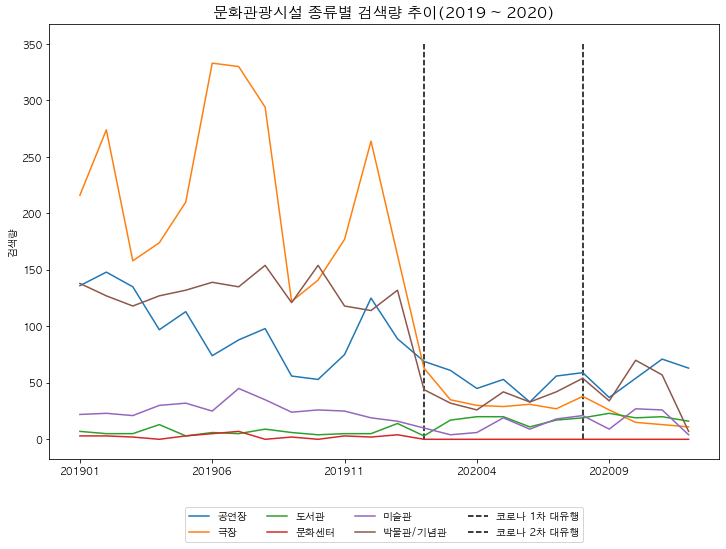

In [121]:
new_d2 = d2.query('소분류 in ["공연장", "극장", "도서관", "문화센터", "미술관", "박물관/기념관"]')
pd.crosstab(new_d2.년월, new_d2.소분류).plot()
plt.title('문화관광시설 종류별 검색량 추이(2019 ~ 2020)', size = 15)
plt.vlines(13, ymin = 0, ymax = 350, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(19, ymin = 0, ymax = 350, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 4)
plt.ylabel('검색량')
plt.xlabel(None)
plt.show()

In [122]:
def tour(x) :
    if x in ['고궁', '고택/생가/민속마을', '기념비', '능묘', '문화유적지'] :
        return '전통관광지'
    elif x in ['명산', '폭포/계곡', '호수', '섬'] :
        return '자연경관'
    else :
        return x

In [123]:
d3.소분류 = d3.소분류.apply(tour)

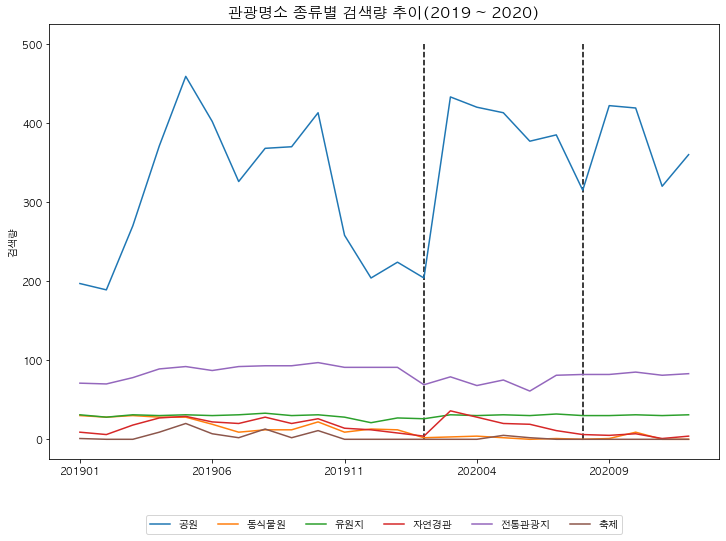

In [124]:
pd.crosstab(d3.년월, d3.query("소분류 in ['전통관광지', '자연경관', '공원', '축제', '동식물원', '유원지']").소분류).plot()
plt.title('관광명소 종류별 검색량 추이(2019 ~ 2020)', size = 15)
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.vlines(13, ymin = 0, ymax = 500, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(19, ymin = 0, ymax = 500, color = 'black', linestyles = '--', label = '코로나 2차 대유행')


plt.ylabel('검색량')
plt.xlabel(None)
plt.show()

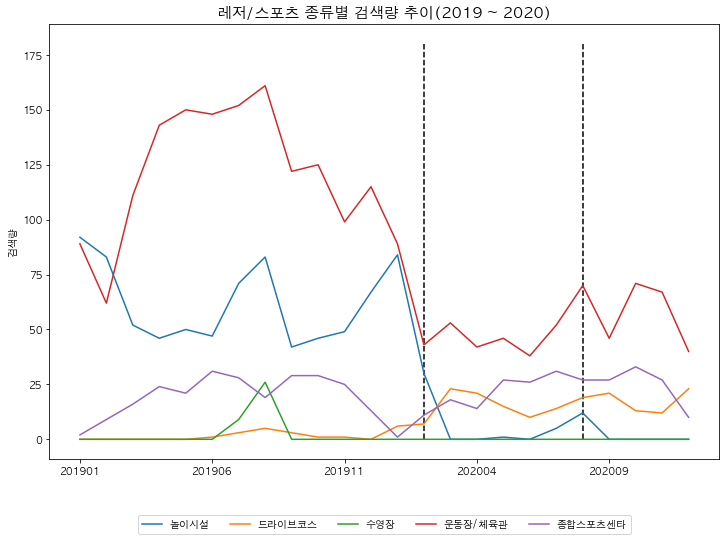

In [125]:
pd.crosstab(d4.년월, d4.query('소분류 in ["운동장/체육관", "놀이시설", "종합스포츠센타", "드라이브코스", "수영장"]').소분류).plot()
plt.title('레저/스포츠 종류별 검색량 추이(2019 ~ 2020)', size = 15)
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.vlines(13, ymin = 0, ymax = 180, color = 'black', linestyles = '--', label = '코로나 1차 대유행')
plt.vlines(19, ymin = 0, ymax = 180, color = 'black', linestyles = '--', label = '코로나 2차 대유행')
plt.ylabel('검색량')
plt.xlabel(None)
plt.show()

### 2-2. 유동인구

In [126]:
move['일자'] = pd.to_datetime(move.일자.astype('str'))
move['월'] = move.일자.dt.month
move['요일'] = move.일자.dt.day_name()
move['년도'] = move.일자.dt.year
move['년월'] = move.년도.astype('str') + ['0' + str(x) if len(str(x)) < 2 else str(x) for x in move.월]

In [127]:
move_19_3 = move.loc[move.년도 == 2019]
move_20_3 = move.loc[move.년월 > '202002']

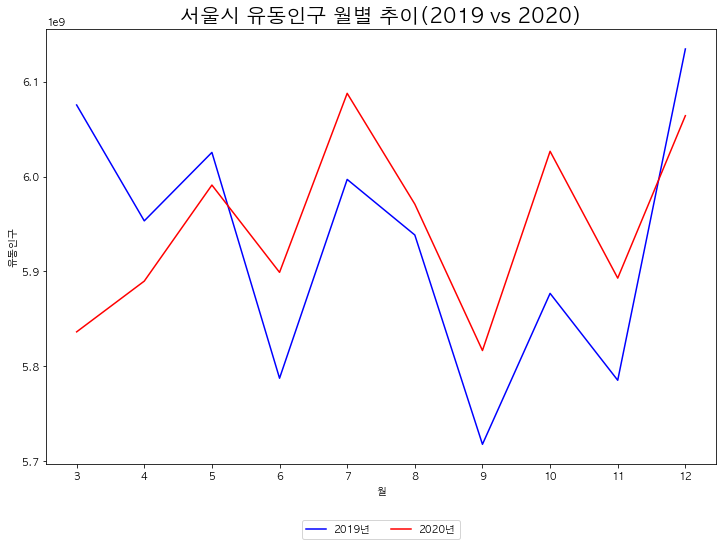

In [128]:
plt.title('서울시 유동인구 월별 추이(2019 vs 2020)', size = 20)
move_19_3.groupby('월').유동인구수.sum().plot(color = 'b', label = '2019년')
move_20_3.groupby('월').유동인구수.sum().plot(color = 'r', label = '2020년')
plt.ylabel('유동인구')
plt.xticks(range(3,13))
plt.legend(loc='center',bbox_to_anchor=(0.5, -.15), ncol = 6)
plt.show()

### 3. 검색량

In [129]:
p = pd.read_csv('전국 공연시설 분석용 키워드 검색량.csv')
b = pd.read_csv('전국 도서시설 분석용 키워드 검색량.csv')
e = pd.read_csv('전국 전시시설 분석용 키워드 검색량.csv')

In [130]:
def get_table(data) :
    data['일자'] = pd.to_datetime(data.SCCNT_DE)
    data['년도'] = data['일자'].dt.year
    data['월'] = data['일자'].dt.month
    data['년월'] = data.년도.astype('str') + ['0' + str(x) if len(str(x)) < 2 else str(x) for x in data.월.astype('str')]
    data['년월'] = data['년월'].astype('str')
    
    return data.groupby('년월').SCCNT_SM.sum()

In [131]:
sccnt_df = pd.concat([get_table(p), get_table(b), get_table(e)], axis = 1)
sccnt_df.columns = ['공연', '도서', '전시']

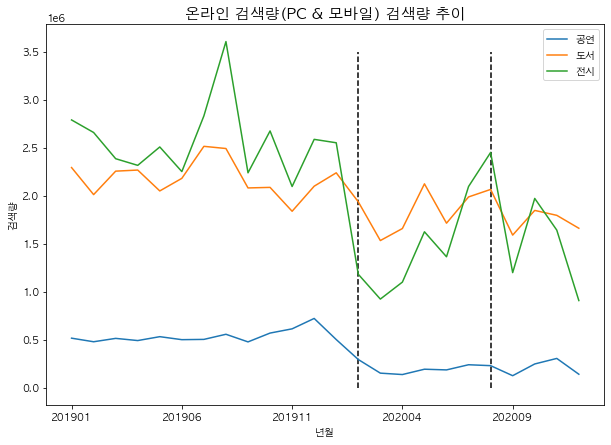

In [134]:
plt.rcParams['figure.figsize'] = (10, 7)
sccnt_df.plot()
plt.title("온라인 검색량(PC & 모바일) 검색량 추이", size = 15)
plt.vlines(13, 0, 3.5e6, color = 'black', linestyle = '--')
plt.vlines(19, 0, 3.5e6, color = 'black', linestyle = '--')
plt.ylabel('검색량')
plt.show()